In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style 
style.use('default')
from sklearn import datasets

from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
x = iris.data
y = iris.target

In [9]:
df_iris = pd.DataFrame(x, columns=iris.feature_names)
df_iris['label'] = iris.target_names[y]

In [10]:
df_iris[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [11]:
pca = PCA(2)

In [13]:
xx = pca.fit_transform(x)
np.shape(x), np.shape(xx)

((150, 4), (150, 2))

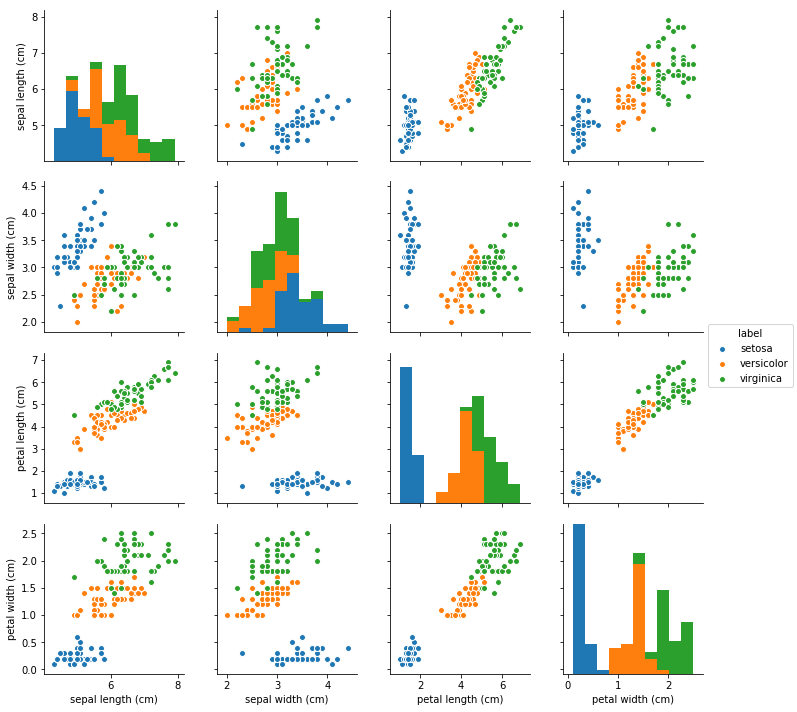

In [14]:
sns.pairplot(df_iris,hue = 'label')

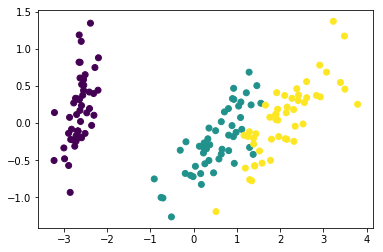

In [15]:
plt.scatter(xx[:,0],xx[:,1],c = y)

In [16]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [14]:
df  = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='title')],axis=1)
df2

,Sex_female,Sex_male,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,title_Dr,title_Etc,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev
PassengerId,,,,,,,,,,,,,,,
1,0,1,3,1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,1,0,3,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0
5,0,1,3,0,0,0,0,1,0,0,0,0,1,0,0
6,0,1,3,0,0,0,1,0,0,0,0,0,1,0,0
7,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
8,0,1,3,3,1,0,0,1,0,0,1,0,0,0,0
9,1,0,3,0,2,0,0,1,0,0,0,0,0,1,0


In [22]:
np.shape(df2.values)

(891, 15)

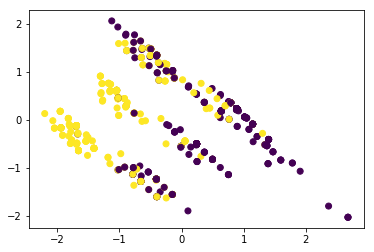

In [23]:
X = df2.values
Y = df.Survived

pca = PCA(3)
x = pca.fit_transform(X)
plt.scatter(x[:,1],x[:,2],c = Y)#섞여 있는 걸 봐서는 주성분 3개로도 구분이 잘 안되는 듯

In [24]:
df3 = pd.DataFrame(x)
df3['PC'] = df.Pclass

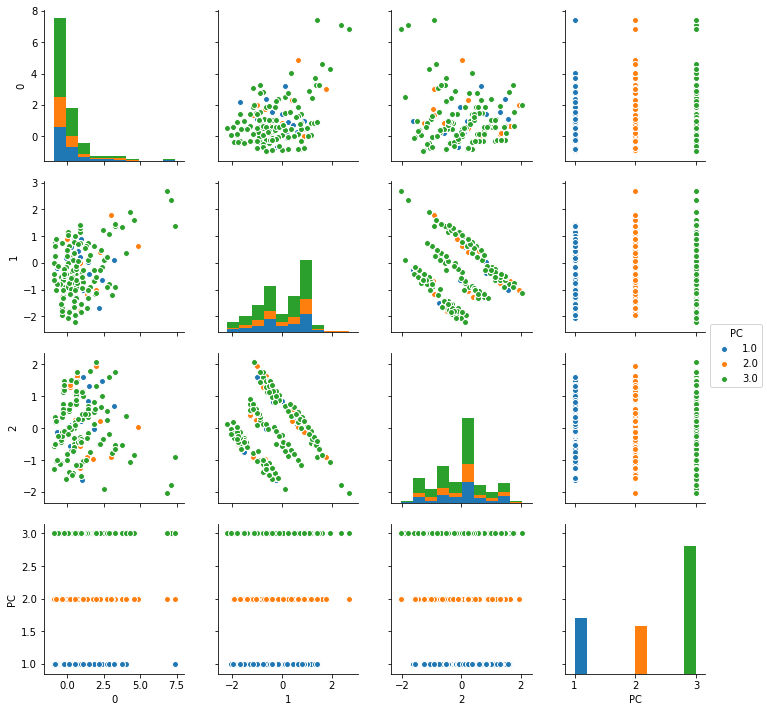

In [25]:
sns.pairplot(df3,hue='PC')

In [1]:
###SVD

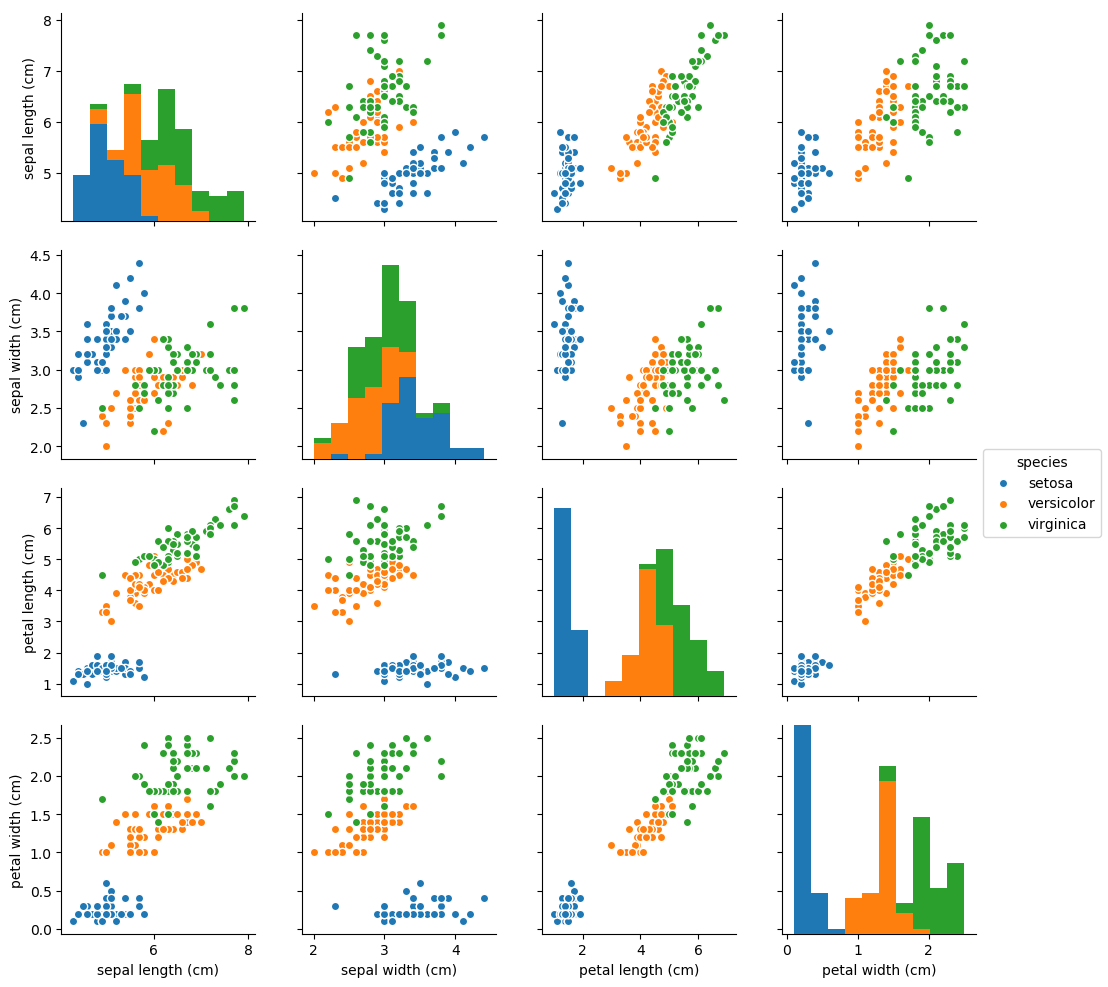

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from matplotlib import style 
style.use('default')

iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]
sns.pairplot(df_iris, hue = 'species')
plt.show()

In [28]:
X = iris.data
Y = iris.target
u,s,vT = np.linalg.svd(X) #u, s, v로 분리

In [29]:
np.shape(u), np.shape(s), np.shape(vT)

((150, 150), (4,), (4, 4))

In [30]:
np.diag(s)

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236]])

In [35]:
x = np.matmul(np.matmul(u[:,:2],np.diag(s[:2])),vT[:2,:2])#행렬 곱

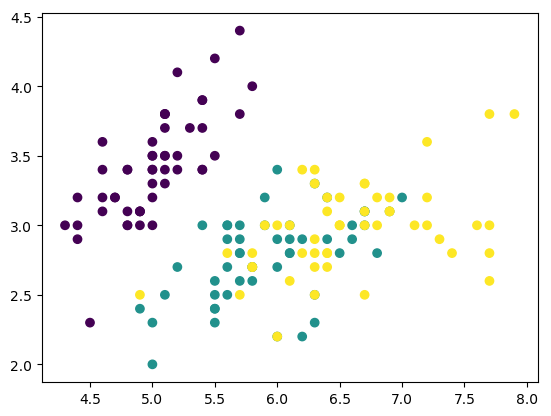

In [36]:
plt.scatter(x[:,0],x[:,1],c = Y)

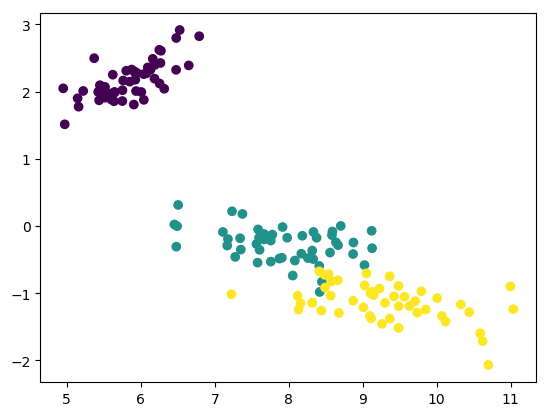

In [11]:
from sklearn.decomposition import TruncatedSVD
tSVD = TruncatedSVD(2)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1],c = Y)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [48]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2['Fare'] = df.Fare
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)
df2
X = df2.values
Y = df.Survived

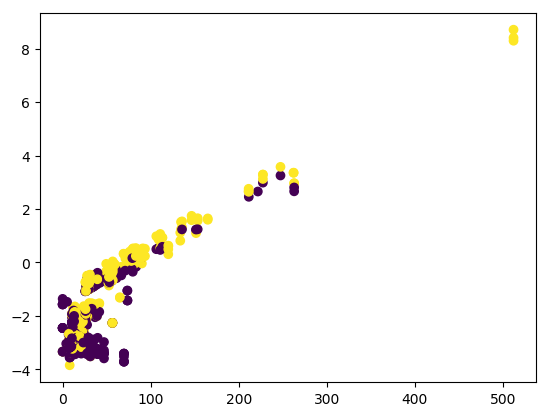

In [18]:
tSVD = TruncatedSVD(2)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1],c = Y)

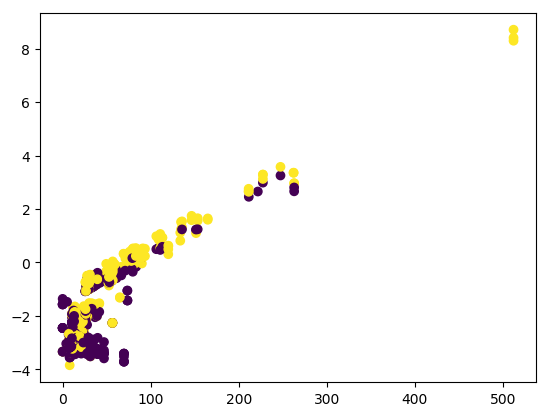

In [19]:
tSVD = TruncatedSVD(4)
tSVD.fit(X)
x = tSVD.transform(X)
plt.scatter(x[:,0],x[:,1],c = Y)

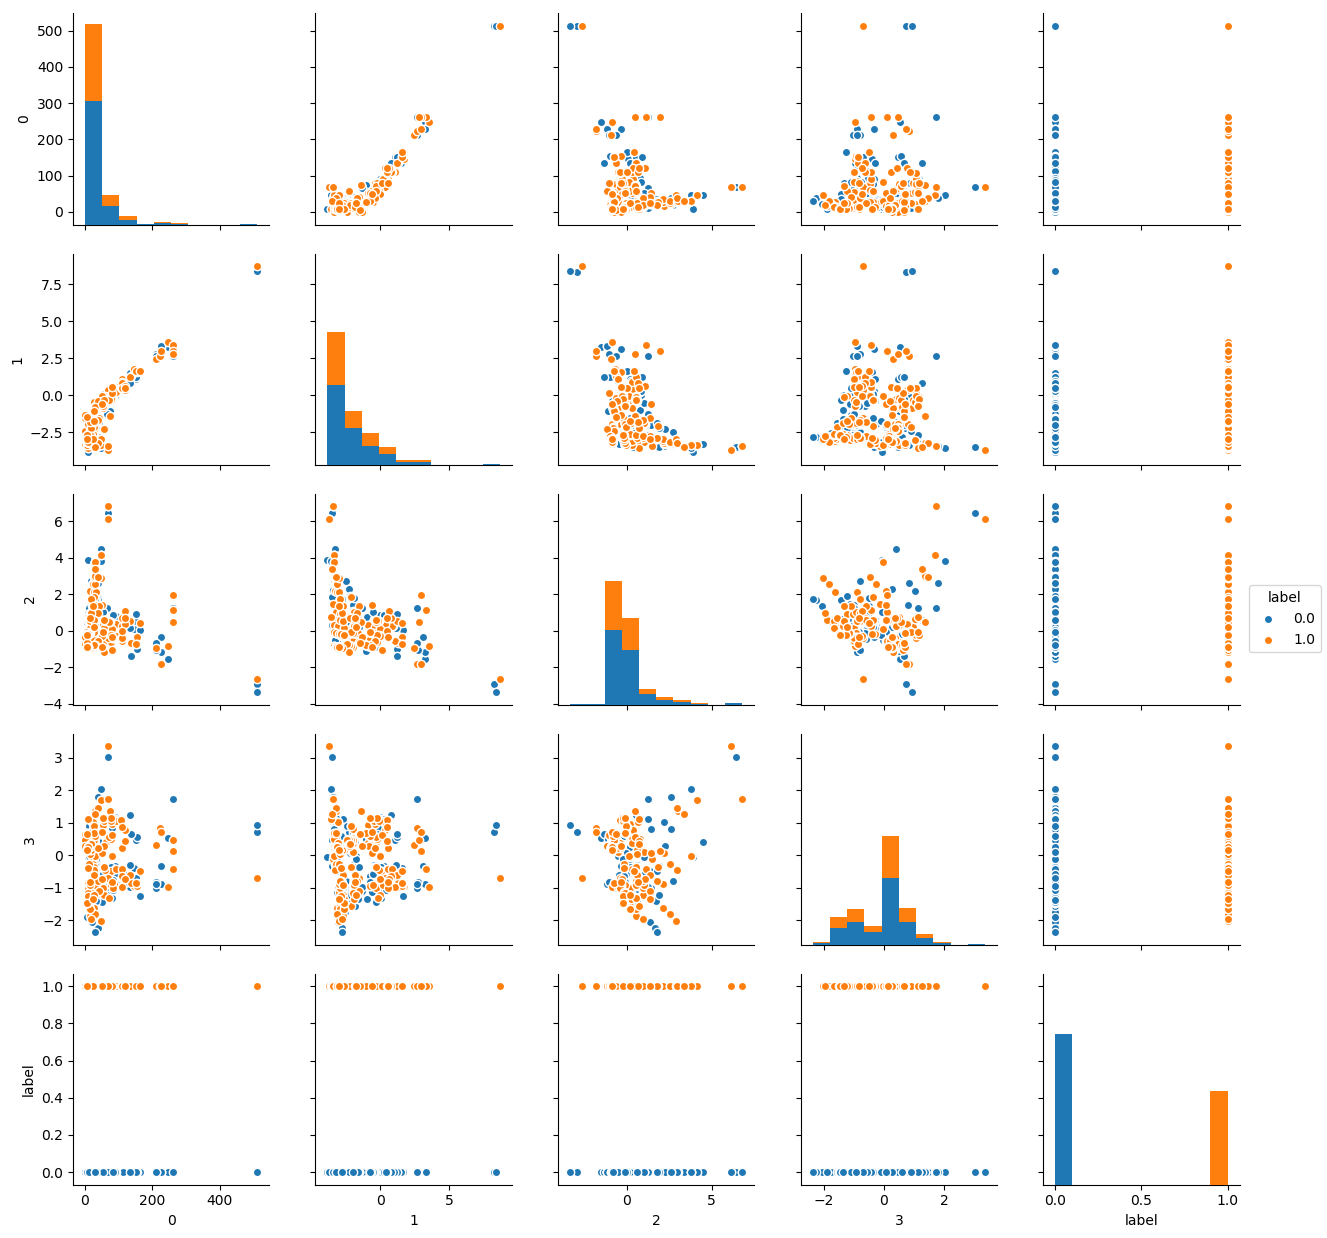

In [20]:
df3 = pd.DataFrame(x)
df3['label'] = df.Survived
sns.pairplot(df3, hue = 'label')

In [21]:
### NMF

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from matplotlib import style 
style.use('default')

from sklearn.decomposition import NMF

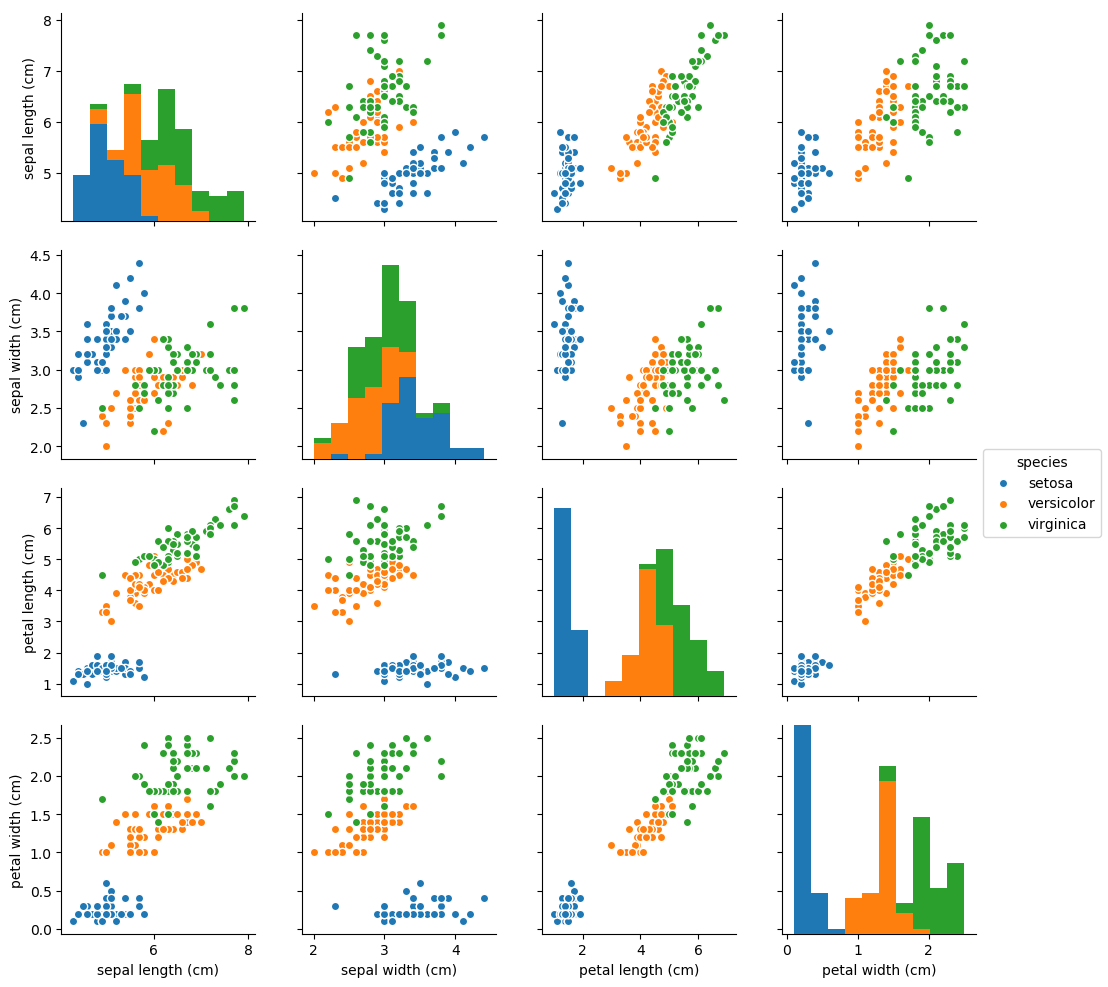

In [38]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target_names[iris.target]
sns.pairplot(df_iris, hue = 'species')
plt.show()

In [39]:
X = iris.data
Y = iris.target

In [40]:
nmf = NMF(2)

In [41]:
nmf.n_components = 2
x = nmf.fit_transform(X)

In [42]:
np.shape(X),np.shape(x)

((150, 4), (150, 2))

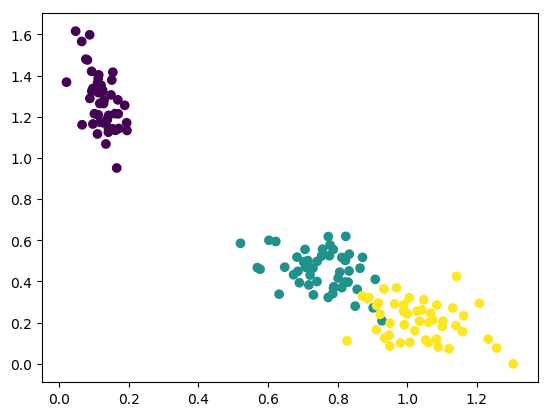

In [43]:
plt.scatter(x[:,0],x[:,1],c=Y)

In [44]:
h = nmf.components_

In [45]:
X - np.matmul(x,h)

array([[-8.21178436e-05, -7.15503983e-04, -2.23138274e-04,
         1.67087043e-03],
       [ 1.49729523e-01, -1.91885281e-01, -5.94709735e-02,
        -5.48924000e-02],
       [ 8.95114038e-03, -1.10753305e-02, -7.98625181e-03,
         8.51179306e-03],
       [-1.88200997e-02,  1.55004117e-02,  3.78459998e-02,
        -6.72999180e-02],
       [-7.95956442e-02,  9.92751109e-02,  3.71996854e-02,
         1.68354919e-02],
       [-1.30612874e-01,  1.72815929e-01,  2.55383458e-02,
         1.14423943e-01],
       [-1.35674185e-01,  1.76384496e-01,  3.88805571e-02,
         8.83043178e-02],
       [-9.60468770e-03,  6.68895925e-03,  2.22481876e-02,
        -4.10658906e-02],
       [ 1.68807712e-02, -2.72044987e-02,  1.27058743e-02,
        -5.35485898e-02],
       [ 9.01043548e-02, -1.29254504e-01,  1.61193164e-02,
        -1.60843771e-01],
       [-3.89275731e-04, -2.12249319e-03,  6.65037536e-03,
        -1.48318631e-02],
       [-9.86407839e-02,  1.14084037e-01,  8.21423371e-02,
      

In [46]:
np.matmul(x,h)

array([[5.10008212, 3.5007155 , 1.40022314, 0.19832913],
       [4.75027048, 3.19188528, 1.45947097, 0.2548924 ],
       [4.69104886, 3.21107533, 1.30798625, 0.19148821],
       [4.6188201 , 3.08449959, 1.462154  , 0.26729992],
       [5.07959564, 3.50072489, 1.36280031, 0.18316451],
       [5.53061287, 3.72718407, 1.67446165, 0.28557606],
       [4.73567418, 3.2236155 , 1.36111944, 0.21169568],
       [5.00960469, 3.39331104, 1.47775181, 0.24106589],
       [4.38311923, 2.9272045 , 1.38729413, 0.25354859],
       [4.80989565, 3.2292545 , 1.48388068, 0.26084377],
       [5.40038928, 3.70212249, 1.49334962, 0.21483186],
       [4.89864078, 3.28591596, 1.51785766, 0.26863803],
       [4.68292087, 3.1601926 , 1.40813121, 0.23743063],
       [4.30514343, 2.99714694, 1.08688093, 0.12444876],
       [5.73642785, 4.06844778, 1.27903021, 0.08937299],
       [5.90853346, 4.11846875, 1.48020228, 0.16561429],
       [5.45761819, 3.80386919, 1.36790536, 0.15327626],
       [5.10282543, 3.48829629,

In [49]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='Embarked')],axis=1)
df2

,Sex_female,Sex_male,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Embarked_Dr,Embarked_Etc,Embarked_Master,Embarked_Miss,Embarked_Mr,Embarked_Mrs,Embarked_Rev
PassengerId,,,,,,,,,,,,,,,
1,0,1,3,1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,1,0,3,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0
5,0,1,3,0,0,0,0,1,0,0,0,0,1,0,0
6,0,1,3,0,0,0,1,0,0,0,0,0,1,0,0
7,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
8,0,1,3,3,1,0,0,1,0,0,1,0,0,0,0
9,1,0,3,0,2,0,0,1,0,0,0,0,0,1,0


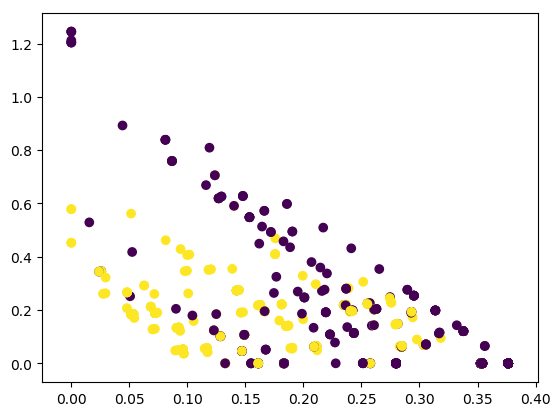

In [50]:
X = df2.values
Y = df.Survived

nmf.n_components = 2
x = nmf.fit_transform(X)
plt.scatter(x[:,0],x[:,1],c=Y)

In [1]:
### t-SNE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

import seaborn as sns
from matplotlib import style 
style.use('default')

from sklearn.manifold import TSNE

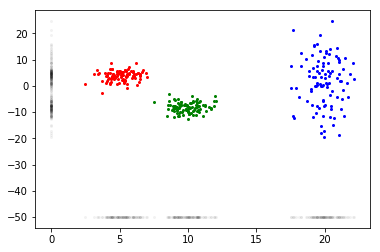

In [19]:
n = 100
x1 = np.random.normal(5,1,n)
y1 = np.random.normal(4,2,n)

x2 = np.random.normal(10,1,n)
y2 = np.random.normal(-8,2,n)

x3 = np.random.normal(20,1,n)
y3 = np.random.normal(2,10,n)

#### main points ####
size = 4
plt.scatter(x1,y1,c='r', s = size)
plt.scatter(x2,y2,c='g', s = size)
plt.scatter(x3,y3,c='b', s = size)

#### y-axis ####
alp = 0.05
plt.scatter(np.zeros(n),y1,c = 'black', s = size, marker = 'x', alpha = alp)
plt.scatter(np.zeros(n),y2,c = 'black', s = size, marker = 'x', alpha = alp)
plt.scatter(np.zeros(n),y3,c = 'black', s = size, marker = 'x', alpha = alp)

#### x-axis ####
plt.scatter(x1,np.zeros(n)-50,c = 'black', s = size, marker = 'x', alpha = alp)
plt.scatter(x2,np.zeros(n)-50,c = 'black', s = size, marker = 'x', alpha = alp)
plt.scatter(x3,np.zeros(n)-50,c = 'black', s = size, marker = 'x', alpha = alp)

In [20]:
tsne = TSNE(2)

In [21]:
x = np.array([x1,x2,x3]).reshape(3*n,1)
y = np.array([y1,y2,y3]).reshape(3*n,1)

In [22]:
X = np.append(x,y,axis=1)
np.shape(X)

(300, 2)

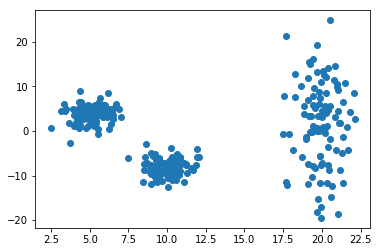

In [23]:
plt.scatter(X[:,0],X[:,1])

In [24]:
x = tsne.fit_transform(X)
a,b = zip(*x)

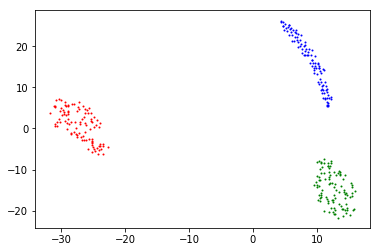

In [25]:
plt.scatter(a[:n],b[:n],c = 'r',s=1)
plt.scatter(a[n:2*n],b[n:2*n],c = 'g',s=1)
plt.scatter(a[2*n:],b[2*n:],c = 'b',s=1)

In [26]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [27]:
tsne.fit_transform(X)
x = tsne.fit_transform(X)
a,b = zip(*x)

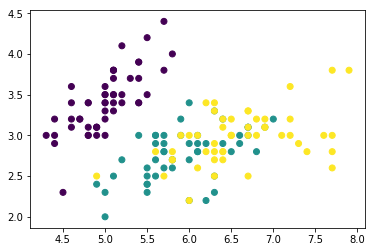

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)#원래 분포

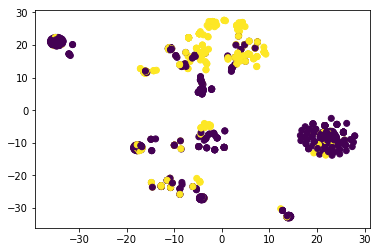

In [37]:
plt.scatter(a,b,c=y)

In [32]:
df = pd.read_csv('./train.csv', index_col=0)
df2 = pd.get_dummies(df.Sex,prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2,pd.get_dummies(df.Embarked,prefix='Embarked')],axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name],index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2,pd.get_dummies(title,prefix='title')],axis=1)

In [34]:
X = df2.values
y = df.Survived.values

In [35]:
tsne.fit_transform(X)
x = tsne.fit_transform(X)
a,b = zip(*x)

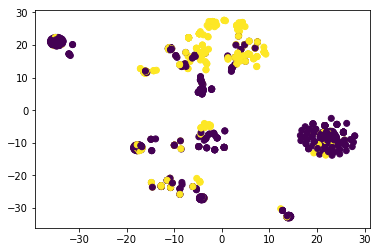

In [36]:
plt.scatter(a,b,c=y)

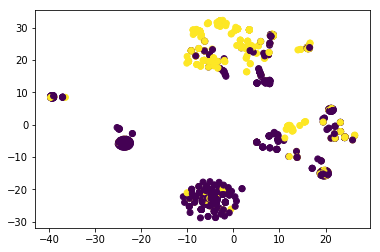

In [38]:
tsne.fit_transform(X)
x = tsne.fit_transform(X)
a,b = zip(*x)
plt.scatter(a,b,c=y)#이 데이터는 다시 해봐도 비슷함